In [1]:
from rdflib import Graph

In [2]:
g = Graph()

In [10]:
g.parse("https://lod-cloud.net/rdf/http:www.msm.com?format=rdf")

HTTPError: HTTP Error 500: Server Error

In [9]:
for i in g.items():
    print(i)

TypeError: Graph.items() missing 1 required positional argument: 'list'

In [2]:
from rdflib import Graph
from rdflib.namespace import FOAF

g = Graph()
# get the data
g.parse("http://danbri.livejournal.com/data/foaf")

# for every foaf:member_name, add foaf:name and remove foaf:member_name
for s, p, o in g.triples((None, FOAF['member_name'], None)):
    g.add((s, FOAF['name'], o))
    g.remove((s, FOAF['member_name'], o))

ParserError: http://danbri.livejournal.com/data/foaf:38:6: Repeat node-elements inside property elements: http://blogs.yandex.ru/schema/foaf/Comments

In [6]:
from rdflib import Graph

# Create a Graph
g = Graph()

# Parse in an RDF file hosted on the Internet
g.parse("http://www.w3.org/People/Berners-Lee/card")

# Loop through each triple in the graph (subj, pred, obj)
for subj, pred, obj in g:
    # Check if there is at least one triple in the Graph
    if (subj, pred, obj) not in g:
       raise Exception("It better be!")

# Print the number of "triples" in the Graph
print(f"Graph g has {len(g)} statements.")
# Prints: Graph g has 86 statements.

# Print out the entire Graph in the RDF Turtle format
print(g.serialize(format="turtle"))

Graph g has 86 statements.
@prefix : <http://xmlns.com/foaf/0.1/> .
@prefix Be: <https://www.w3.org/People/Berners-Lee/> .
@prefix Pub: <https://timbl.com/timbl/Public/> .
@prefix blog: <http://dig.csail.mit.edu/breadcrumbs/blog/> .
@prefix card: <https://www.w3.org/People/Berners-Lee/card#> .
@prefix cc: <http://creativecommons.org/ns#> .
@prefix cert: <http://www.w3.org/ns/auth/cert#> .
@prefix con: <http://www.w3.org/2000/10/swap/pim/contact#> .
@prefix dc: <http://purl.org/dc/elements/1.1/> .
@prefix dct: <http://purl.org/dc/terms/> .
@prefix doap: <http://usefulinc.com/ns/doap#> .
@prefix geo1: <http://www.w3.org/2003/01/geo/wgs84_pos#> .
@prefix ldp: <http://www.w3.org/ns/ldp#> .
@prefix s: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema1: <http://schema.org/> .
@prefix sioc: <http://rdfs.org/sioc/ns#> .
@prefix solid: <http://www.w3.org/ns/solid/terms#> .
@prefix space: <http://www.w3.org/ns/pim/space#> .
@prefix vcard: <http://www.w3.org/2006/vcard/ns#> .
@prefix w3c: 

In [10]:
from rdflib import Graph, Literal, RDF, URIRef
# rdflib knows about quite a few popular namespaces, like W3C ontologies, schema.org etc.
from rdflib.namespace import FOAF , XSD

# Create a Graph
g = Graph()

# Create an RDF URI node to use as the subject for multiple triples
donna = URIRef("https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%88%D1%82%D0%B8%D0%B0%D0%BD%D1%83_%D0%A0%D0%BE%D0%BD%D0%B0%D0%BB%D0%B4%D1%83")

# Add triples using store's add() method.
g.add((donna, RDF.type, FOAF.Person))
g.add((donna, FOAF.nick, Literal("donna", lang="en")))
g.add((donna, FOAF.name, Literal("Donna Fales")))
g.add((donna, FOAF.mbox, URIRef("mailto:donna@example.org")))

# Add another person
ed = URIRef("http://example.org/edward")

# Add triples using store's add() method.
g.add((ed, RDF.type, FOAF.Person))
g.add((ed, FOAF.nick, Literal("ed", datatype=XSD.string)))
g.add((ed, FOAF.name, Literal("Edward Scissorhands")))
g.add((ed, FOAF.mbox, Literal("e.scissorhands@example.org", datatype=XSD.anyURI)))

# Iterate over triples in store and print them out.
print("--- printing raw triples ---")
for s, p, o in g:
    print((s, p, o))

# For each foaf:Person in the store, print out their mbox property's value.
print("--- printing mboxes ---")
for person in g.subjects(RDF.type, FOAF.Person):
    for mbox in g.objects(person, FOAF.mbox):
        print(mbox)

# Bind the FOAF namespace to a prefix for more readable output
g.bind("foaf", FOAF)

# print all the data in the Notation3 format
print("--- printing mboxes ---")
print(g.serialize(format='n3'))

--- printing raw triples ---
(rdflib.term.URIRef('https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%88%D1%82%D0%B8%D0%B0%D0%BD%D1%83_%D0%A0%D0%BE%D0%BD%D0%B0%D0%BB%D0%B4%D1%83'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/mbox'), rdflib.term.URIRef('mailto:donna@example.org'))
(rdflib.term.URIRef('http://example.org/edward'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/nick'), rdflib.term.Literal('ed', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
(rdflib.term.URIRef('http://example.org/edward'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Person'))
(rdflib.term.URIRef('https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%88%D1%82%D0%B8%D0%B0%D0%BD%D1%83_%D0%A0%D0%BE%D0%BD%D0%B0%D0%BB%D0%B4%D1%83'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/nick'), rdflib.term.Literal('donna', lang='en'))
(rdflib.term.URIRef('https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%88%D1%82%D0%B8%D0

In [9]:
from rdflib import Graph

# Create a Graph, pare in Internet data
g = Graph().parse("http://www.w3.org/People/Berners-Lee/card")

# Query the data in g using SPARQL
# This query returns the 'name' of all ``foaf:Person`` instances
q = """
    PREFIX foaf: <http://xmlns.com/foaf/0.1/>

    SELECT ?name
    WHERE {
        ?p rdf:type foaf:Person .

        ?p foaf:name ?name .
    }
"""

# Apply the query to the graph and iterate through results
for r in g.query(q):
    print(r["name"])

# prints: Timothy Berners-Lee

PluginException: No plugin registered for (text/html, <class 'rdflib.parser.Parser'>)

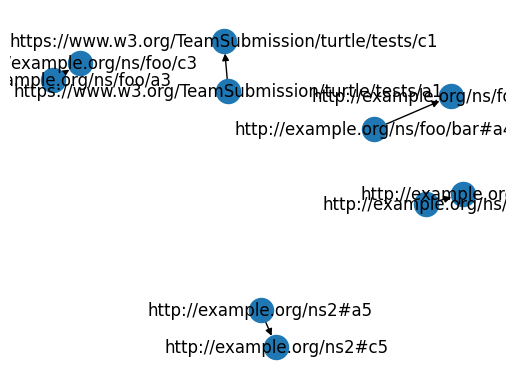

In [13]:
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt

url = 'https://www.w3.org/TeamSubmission/turtle/tests/test-30.ttl'

g = rdflib.Graph()
result = g.parse(url, format='turtle')

G = rdflib_to_networkx_multidigraph(result)

# Plot Networkx instance of RDF Graph
pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, with_labels=True)

#if not in interactive mode for 
plt.show()

In [20]:
from rdflib import Graph

# Create a Graph, pare in Internet data
g = Graph().parse("https://dbpedia.org/sparql")

# Query the data in g using SPARQL
# This query returns the 'name' of all ``foaf:Person`` instances
q = """
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?cityName ?stadiumName WHERE {
  ?stadium rdf:type dbo:Stadium .
  ?stadium dbo:location ?city .
  ?city rdfs:label ?cityName .
  ?stadium rdfs:label ?stadiumName .
  ?stadium dbo:tenant ?team .
  ?team rdf:type dbo:SoccerClub .
  FILTER (LANG(?cityName) = 'en')
  FILTER (LANG(?stadiumName) = 'en')
}
LIMIT 100
"""

# Apply the query to the graph and iterate through results
for r in g.query(q):
    print(r["stadiumName"])

lol = g.query(q).serialize(format='json')
print(lol)

b'{"results": {"bindings": []}, "head": {"vars": ["cityName", "stadiumName"]}}'


In [23]:
from SPARQLWrapper import SPARQLWrapper, JSON

# Define the SPARQL endpoint and the query
sparql = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.setQuery("""
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?cityName ?stadiumName WHERE {
  ?stadium rdf:type dbo:Stadium .
  ?stadium dbo:location ?city .
  ?city rdfs:label ?cityName .
  ?stadium rdfs:label ?stadiumName .
  ?stadium dbo:tenant ?team .
  ?team rdf:type dbo:SoccerClub .
  FILTER (LANG(?cityName) = 'en')
  FILTER (LANG(?stadiumName) = 'en')
}
LIMIT 100
""")

# Set the return format to JSON
sparql.setReturnFormat(JSON)

# Execute the query and process the results
results = sparql.query().convert()
print(results)
for result in results["results"]["bindings"]:
    print(result["stadiumName"]["value"], "-", result["cityName"]["value"])


{'head': {'link': [], 'vars': ['cityName', 'stadiumName']}, 'results': {'distinct': False, 'ordered': True, 'bindings': [{'cityName': {'type': 'literal', 'xml:lang': 'en', 'value': 'California'}, 'stadiumName': {'type': 'literal', 'xml:lang': 'en', 'value': 'California Memorial Stadium'}}, {'cityName': {'type': 'literal', 'xml:lang': 'en', 'value': 'California, PA'}, 'stadiumName': {'type': 'literal', 'xml:lang': 'en', 'value': 'California University of Pennsylvania Convocation Center'}}, {'cityName': {'type': 'literal', 'xml:lang': 'en', 'value': 'California University of Pennsylvania'}, 'stadiumName': {'type': 'literal', 'xml:lang': 'en', 'value': 'California University of Pennsylvania Convocation Center'}}, {'cityName': {'type': 'literal', 'xml:lang': 'en', 'value': 'Cardiff'}, 'stadiumName': {'type': 'literal', 'xml:lang': 'en', 'value': 'Cardiff International Sports Stadium'}}, {'cityName': {'type': 'literal', 'xml:lang': 'en', 'value': 'Cardiff'}, 'stadiumName': {'type': 'literal

In [26]:
from rdflib import Graph, URIRef, Literal, Namespace
from rdflib.namespace import RDF, RDFS
from SPARQLWrapper import SPARQLWrapper, JSON

city_stadium_query = """
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?cityName ?stadiumName WHERE {
  ?stadium rdf:type dbo:Stadium .
  ?stadium dbo:location ?city .
  ?city rdfs:label ?cityName .
  ?stadium rdfs:label ?stadiumName .
  ?stadium dbo:tenant ?team .
  ?team rdf:type dbo:SoccerClub .
  FILTER (LANG(?cityName) = 'en')
  FILTER (LANG(?stadiumName) = 'en')
}
LIMIT 100
"""


# Step 1: Query the SPARQL Endpoint
sparql = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.setQuery(city_stadium_query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

# Step 2: Create an RDF Graph
g = Graph()

# Step 3: Define Namespaces and URIs
dbo = Namespace("http://dbpedia.org/ontology/")
ex = Namespace("http://example.org/")

# Step 4: Add Triples to the Graph
for result in results["results"]["bindings"]:
    stadium_name = result["stadiumName"]["value"]
    city_name = result["cityName"]["value"]

    stadium_uri = URIRef(ex[stadium_name.replace(" ", "_")])
    city_uri = URIRef(ex[city_name.replace(" ", "_")])

    g.add((stadium_uri, RDF.type, dbo.Stadium))
    g.add((stadium_uri, RDFS.label, Literal(stadium_name)))
    g.add((stadium_uri, dbo.location, city_uri))

# Step 5: Serialize the Graph
print(g.serialize(format="turtle"))


@prefix ns1: <http://dbpedia.org/ontology/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

<http://example.org/Beaver_Field_at_Jim_and_Bettie_Smith_Stadium> a ns1:Stadium ;
    rdfs:label "Beaver Field at Jim and Bettie Smith Stadium" ;
    ns1:location <http://example.org/Boone,_North_Carolina> .

<http://example.org/Beijing_Fengtai_Stadium> a ns1:Stadium ;
    rdfs:label "Beijing Fengtai Stadium" ;
    ns1:location <http://example.org/Beijing> .

<http://example.org/Belson_Stadium> a ns1:Stadium ;
    rdfs:label "Belson Stadium" ;
    ns1:location <http://example.org/Queens>,
        <http://example.org/Utopia_Parkway_(Queens)> .

<http://example.org/Caja_Mágica> a ns1:Stadium ;
    rdfs:label "Caja Mágica" ;
    ns1:location <http://example.org/San_Fermín_(Madrid)> .

<http://example.org/California_Memorial_Stadium> a ns1:Stadium ;
    rdfs:label "California Memorial Stadium" ;
    ns1:location <http://example.org/Berkeley,_California>,
        <http://example.org/Califo